## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [5]:
data = pd.read_csv("Titanic_train.csv")

## 觀察 Age

In [6]:
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


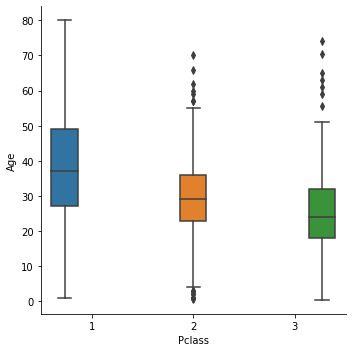

In [10]:
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=data,kind="box")
#Pclass和Age有關係，Pclass越大，年齡越低。

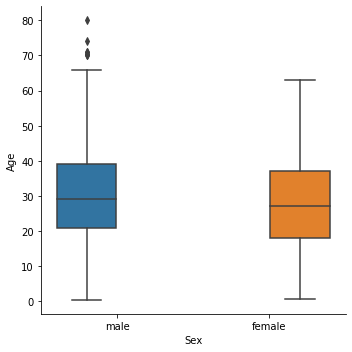

In [11]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=data,kind="box")

TypeError: can't multiply sequence by non-int of type 'float'

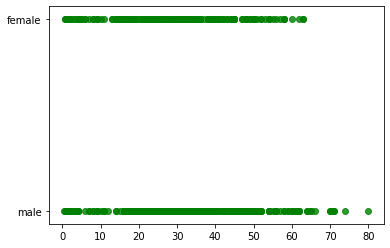

In [15]:
g = sns.regplot(x="Age", y="Sex", color="g",data=data)

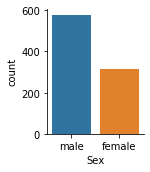

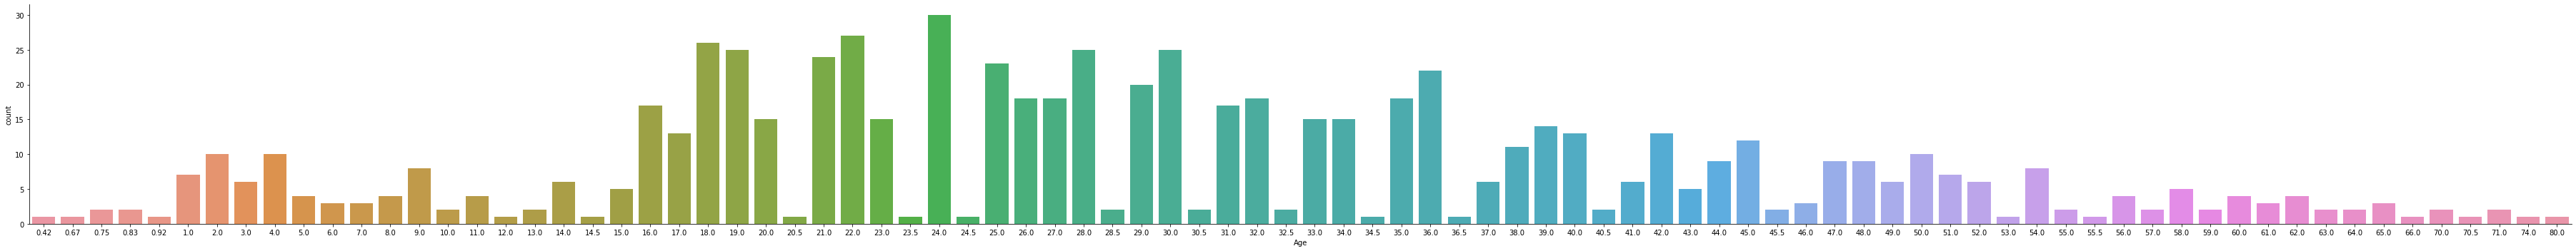

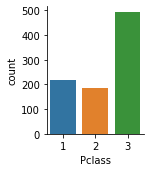

In [21]:
g = sns.catplot("Sex",
                data=data,
                kind="count", height=2.5, aspect=.8)
b = sns.catplot("Age",
                data=data,
                kind="count", height=5, aspect=10)
g = sns.catplot("Pclass",
                data=data,
                kind="count", height=2.5, aspect=.8)

In [22]:
missing_index=data.isnull()
display(data[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
#離散轉連續
copy_data=data.copy() #複製一份資料給 data
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
copy_data['Sex']=le.fit_transform(copy_data['Sex'])
display(copy_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [52]:
pd.set_option("display.max_columns", 1000)
data1 = pd.DataFrame(copy_data,columns =['Pclass','Sex','Age'])

In [53]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data1)))

0          1          2          3          4         5  \
0     0.000000  16.155494   4.123106  13.190906  13.000000  0.000000   
1    16.155494   0.000000  12.165525   3.000000   3.741657  2.738613   
2     4.123106  12.165525   0.000000   9.219544   9.055385  1.224745   
3    13.190906   3.000000   9.219544   0.000000   2.236068  2.738613   
4    13.000000   3.741657   9.055385   2.236068   0.000000  0.000000   
..         ...        ...        ...        ...        ...       ...   
886   5.099020  11.090537   1.732051   8.124038   8.062258  1.224745   
887   3.741657  19.000000   7.280110  16.000000  16.155494  2.738613   
888   1.224745   2.449490   0.000000   2.449490   1.224745  1.224745   
889   4.472136  12.041595   2.236068   9.055385   9.219544  2.449490   
890  10.000000   6.403124   6.082763   3.741657   3.000000  0.000000   

             6          7          8          9         10         11  \
0    32.062439  20.000000   5.099020   8.124038  18.027756  36.069378   
1    16.031220  36.069378  11.180340  24.020824  34.058773  20.000000   
2    28.089144  24.020824   1.000000  12.041595  22.000000  32.062439   
3    19.026298  33.075671   8.246211  21.023796  31.064449  23.000000   
4    19.104973  33.000000   8.062258  21.047565  31.016125  23.108440   
..         ...        ...        ...        ...        ...        ...   
886  27.018512  25.019992   1.414214  13.038405  23.043437  31.032241   
887  35.014283  17.146428   8.246211   5.099020  15.132746  39.000000   
888   2.738613   1.224745   0.000000   1.224745   0.000000   2.449490   
889  28.000000  24.083189   2.449490  12.083046  22.113344  32.015621   
890  22.090722  30.000000   5.099020  18.055470  28.017851  26.095977   

            12         13         14         15         16        17  \
0     2.000000  17.000000   8.062258  33.030289  20.000000  1.224745   
1    18.138357   2.449490  24.083189  17.029386  36.069378  1.732051   
2     6.082763  13.038405  12.000000  29.017236  24.020824  1.732051   
3    15.165751   4.582576  21.095023  20.024984  33.075671  1.732051   
4    15.000000   4.000000  21.023796  20.049938  33.000000  1.224745   
..         ...        ...        ...        ...        ...       ...   
886   7.071068  12.041595  13.076697  28.017851  25.019992  0.000000   
887   2.449490  20.124612   5.385165  36.013886  17.146428  1.732051   
888   1.224745   1.224745   0.000000   1.224745   1.224745  1.732051   
889   6.324555  13.152946  12.206556  29.034462  24.083189  1.224745   
890  12.000000   7.000000  18.027756  23.043437  30.000000  1.224745   

            18        19         20         21         22         23  \
0     9.055385  1.224745  13.038405  12.041595   7.071068   6.324555   
1     7.280110  2.449490   3.316625   4.242641  23.086793  10.049876   
2     5.000000  0.000000   9.110434   8.124038  11.000000   3.000000   
3     4.472136  2.449490   1.414214   1.732051  20.099751   7.071068   
4     4.123106  1.224745   1.000000   1.414214  20.024984   7.280110   
..         ...       ...        ...        ...        ...        ...   
886   4.242641  1.732051   8.000000   7.000000  12.083046   1.414214   
887  12.165525  2.449490  16.062378  15.066519   4.472136   9.055385   
888   0.000000  0.000000   1.732051   1.732051   0.000000   2.738613   
889   5.477226  2.738613   9.055385   8.062258  11.224972   2.000000   
890   1.414214  1.224745   3.162278   2.236068  17.029386   4.472136   

            24         25        26         27        28        29         30  \
0    14.035669  16.031220  0.000000   3.605551  1.224745  0.000000  18.110770   
1    30.066593   2.000000  2.738613  19.026298  2.449490  2.738613   2.236068   
2    18.000000  12.000000  1.224745   7.348469  0.000000  1.224745  14.177447   
3    27.073973   3.605551  2.738613  16.031220  2.449490  2.738613   5.099020   
4    27.018512   3.162278  0.000000  16.124515  1.224745  0.000000   5.385165   
..         ...        ...       ...        ...       ..

In [54]:
missing_index=data1.isnull()
display(data1[missing_index.values==True])

,Pclass,Sex,Age
5,3,1,NaN
17,2,1,NaN
19,3,0,NaN
26,3,1,NaN
28,3,0,NaN
...,...,...,...
859,3,1,NaN
863,3,0,NaN
868,3,1,NaN
878,3,1,NaN


In [55]:
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data1))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,26.0
889,1.0,1.0,26.0


In [79]:
# KNN
# 設定 k 值
value_neighbors=2
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator=True)
df_filled = pd.DataFrame(imputer.fit_transform(data1))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled.rename(columns={0:'Pclass',1:'Sex',2:'Age',3:'Add_indicator'},inplace=True)
display(df_filled)

,Pclass,Sex,Age,Add_indicator
0,3.0,1.0,22.0,0.0
1,1.0,0.0,38.0,0.0
2,3.0,0.0,26.0,0.0
3,1.0,0.0,35.0,0.0
4,3.0,1.0,35.0,0.0
...,...,...,...,...
886,2.0,1.0,27.0,0.0
887,1.0,0.0,19.0,0.0
888,3.0,0.0,26.5,1.0
889,1.0,1.0,26.0,0.0


In [58]:
# KNN
# 設定 k 值
value_neighbors=3
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator=True)
df_filled = pd.DataFrame(imputer.fit_transform(data1))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2,3
0,3.0,1.0,22.0,0.0
1,1.0,0.0,38.0,0.0
2,3.0,0.0,26.0,0.0
3,1.0,0.0,35.0,0.0
4,3.0,1.0,35.0,0.0
...,...,...,...,...
886,2.0,1.0,27.0,0.0
887,1.0,0.0,19.0,0.0
888,3.0,0.0,19.0,1.0
889,1.0,1.0,26.0,0.0
